# PCA

## MNIST 
Датасет рукописных цифр. 

* Каждая цифра - черно-белая картинка 8x8 пикселей, закодированная массивом из 64 ячеек
* Каждая ячейка - цифра от 0 до 16, описывающая градацию серого цвета в этой ячейки
* Количество экземпляров: 1797
* Количество классов: 10
* Количество экземпляров на класс: ~180

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize'] = (10, 5)

In [2]:
from sklearn import datasets
digits = datasets.load_digits()
X_digits = digits.data

In [3]:
X_digits[0]

array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
        15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
         8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
         5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
         1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
         0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.])

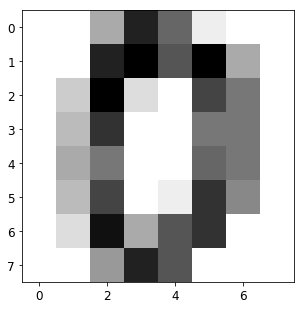

In [4]:
plt.imshow(X_digits[0].reshape(8, 8), cmap=plt.cm.binary)

## Уменьшим размерность

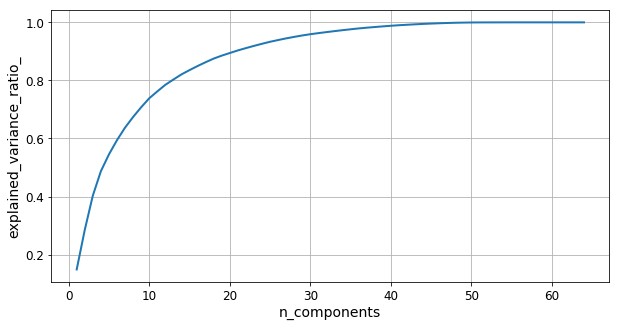

In [5]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_digits)

cum_evr = np.cumsum(pca.explained_variance_ratio_)
xs = np.arange(cum_evr.size) + 1
plt.plot(xs, cum_evr, linewidth=2)
plt.grid()
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

In [11]:
np.set_printoptions(suppress=True)
pca.explained_variance_ratio_ * 100

array([ 14.89,  13.62,  11.79,   8.41,   5.78,   4.92,   4.32,   3.66,
         3.35,   3.08,   2.37,   2.27,   1.82,   1.77,   1.47,   1.41,
         1.32,   1.25,   1.02,   0.91,   0.89,   0.8 ,   0.77,   0.72,
         0.7 ,   0.6 ,   0.58,   0.52,   0.49,   0.43,   0.37,   0.35,
         0.34,   0.33,   0.31,   0.29,   0.26,   0.23,   0.22,   0.21,
         0.19,   0.16,   0.15,   0.14,   0.12,   0.11,   0.1 ,   0.08,
         0.06,   0.04,   0.02,   0.01,   0.01,   0.01,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ])

In [14]:
pca.components_[-1]

array([ 1., -0.,  0., -0.,  0.,  0.,  0., -0., -0.,  0.,  0., -0.,  0.,
       -0., -0.,  0.,  0., -0., -0.,  0.,  0.,  0., -0.,  0., -0.,  0.,
       -0.,  0., -0.,  0.,  0., -0., -0.,  0.,  0.,  0.,  0.,  0., -0.,
       -0.,  0.,  0.,  0., -0.,  0.,  0., -0.,  0.,  0., -0., -0.,  0.,
       -0., -0.,  0., -0., -0.,  0., -0.,  0.,  0.,  0., -0.,  0.])

Уже на 40 компонентах мы объяснили почти весь variance. Похоже на правду?

In [6]:
from sklearn.preprocessing import binarize
bin_X = binarize(X_digits).sum(axis=0)  # считаем сколько раз активизировалась каждая из 64 ячеек

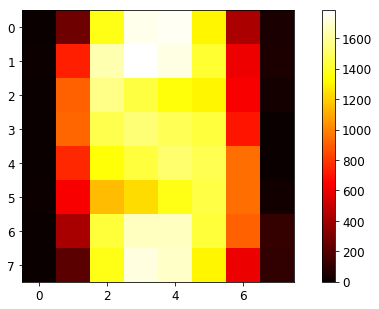

In [7]:
plt.imshow(bin_X.reshape(8, 8), cmap=plt.cm.hot)
plt.colorbar()

## Kernel PCA

In [8]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

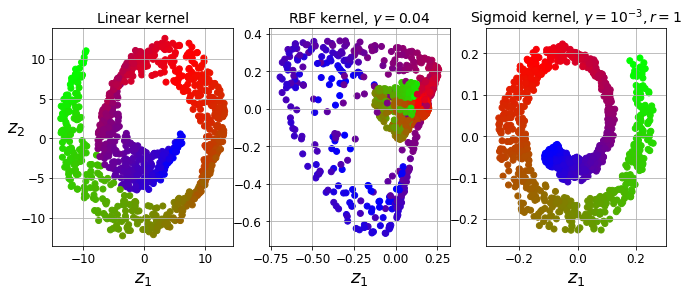

In [9]:
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.brg)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

## Manifold Learning

In [10]:
from sklearn.manifold import MDS, Isomap, TSNE

# уменьшает размерность, пытаясь сохранить расстояние между объектами
mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X)

# создает граф, соединяя объекты с их ближайшими соседями
# уменьшает размерность, пытаясь сохранить геодезическое расстояние 
# (количество узлов в кратчайшем пути между двумя исходными вершинами графа)
isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X)

# уменьшает размерность, пытаясь сохранить близкие в исходном пространстве объекты ближе друг к другу, 
# а далекие подальше друг от друга (часто используется для визуализации кластеров)
tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)

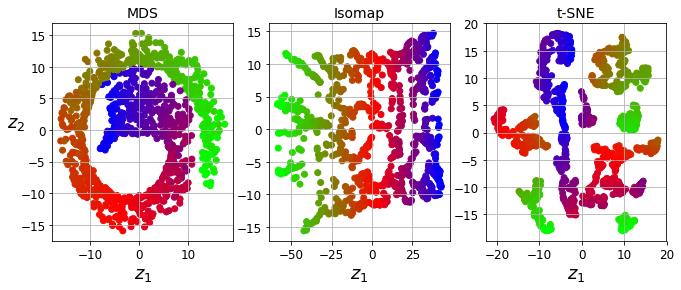

In [11]:
titles = ["MDS", "Isomap", "t-SNE"]

plt.figure(figsize=(11,4))

for subplot, title, X_reduced in zip((131, 132, 133), titles, (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.brg)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

А здесь можно поиграть с визуализацией: http://projector.tensorflow.org/